In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



In [2]:
dataset = pd.read_csv(r"sample_load_data.csv")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dff = dataset.copy()
#dataset = dff.copy()

Text(0, 0.5, 'Type of action')

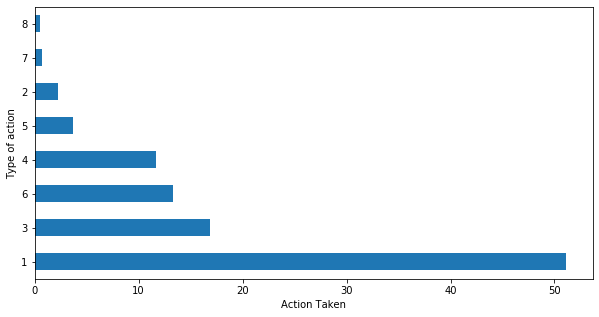

In [5]:
action_taken_percent = dataset['action_taken'].value_counts(normalize=True)*100
plt.figure(figsize=(10, 5))
ax = action_taken_percent.plot(kind='barh')
ax.set_xlabel('Action Taken')
ax.set_ylabel('Type of action')

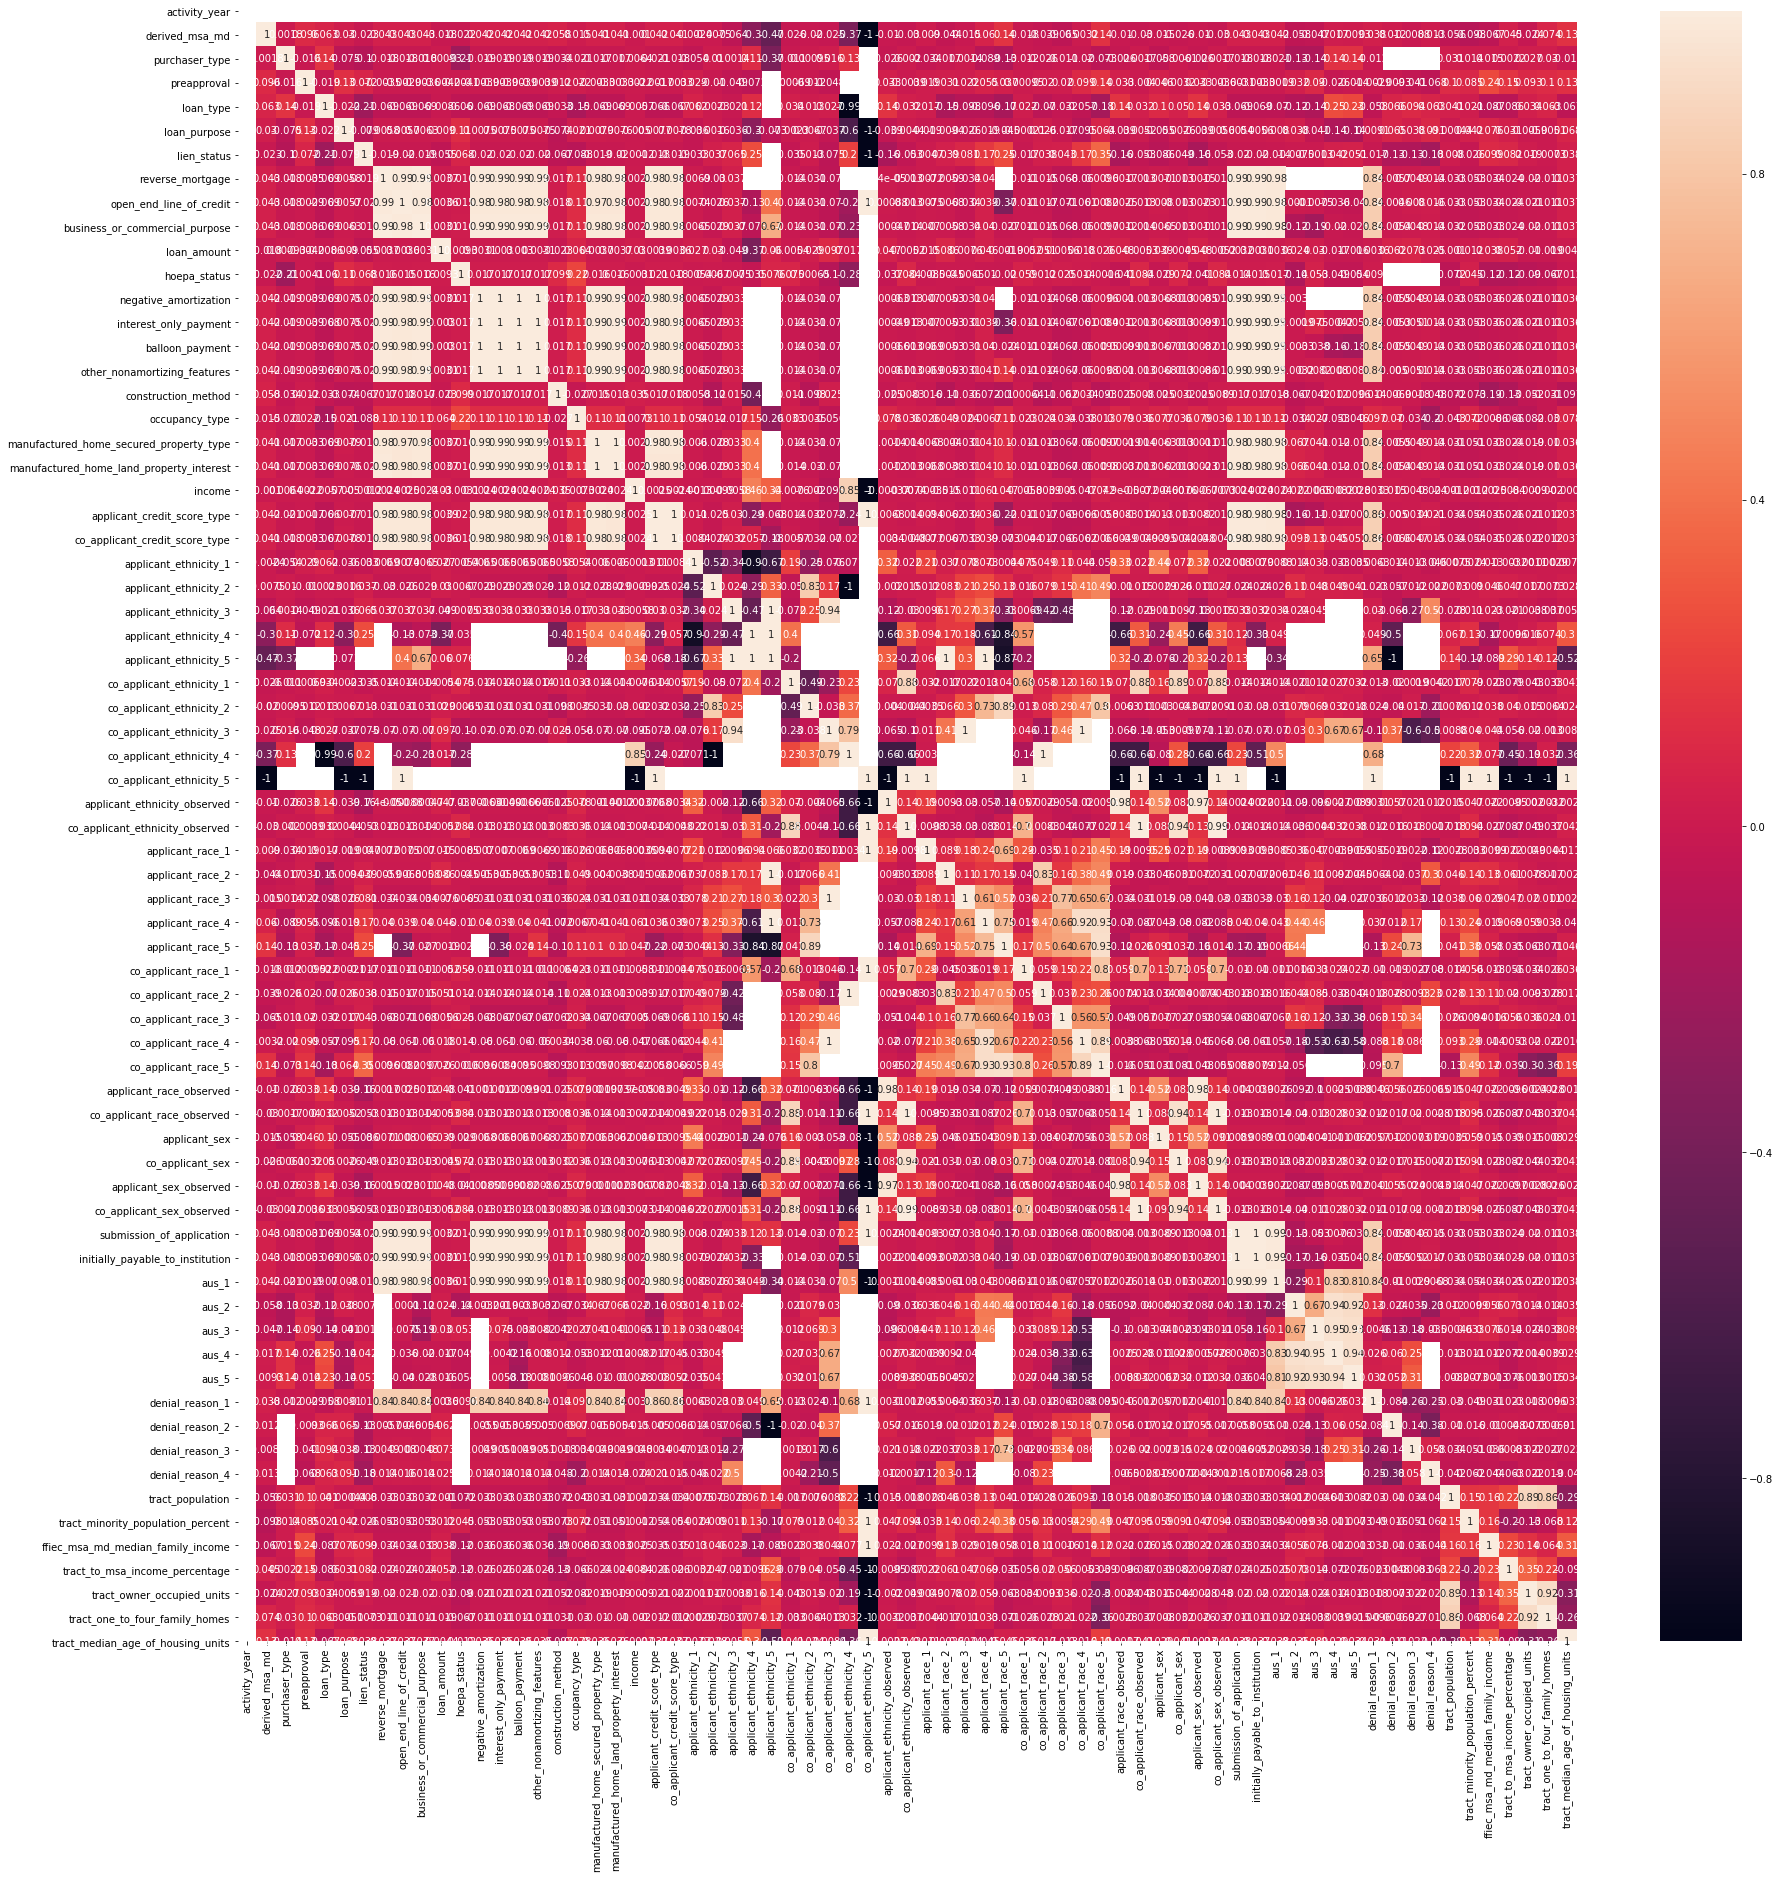

In [160]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset.drop('action_taken', axis=1).corr(), annot=True);

([<matplotlib.axis.YTick at 0x1a28ba82e8>,
 <a list of 70 Text yticklabel objects>)

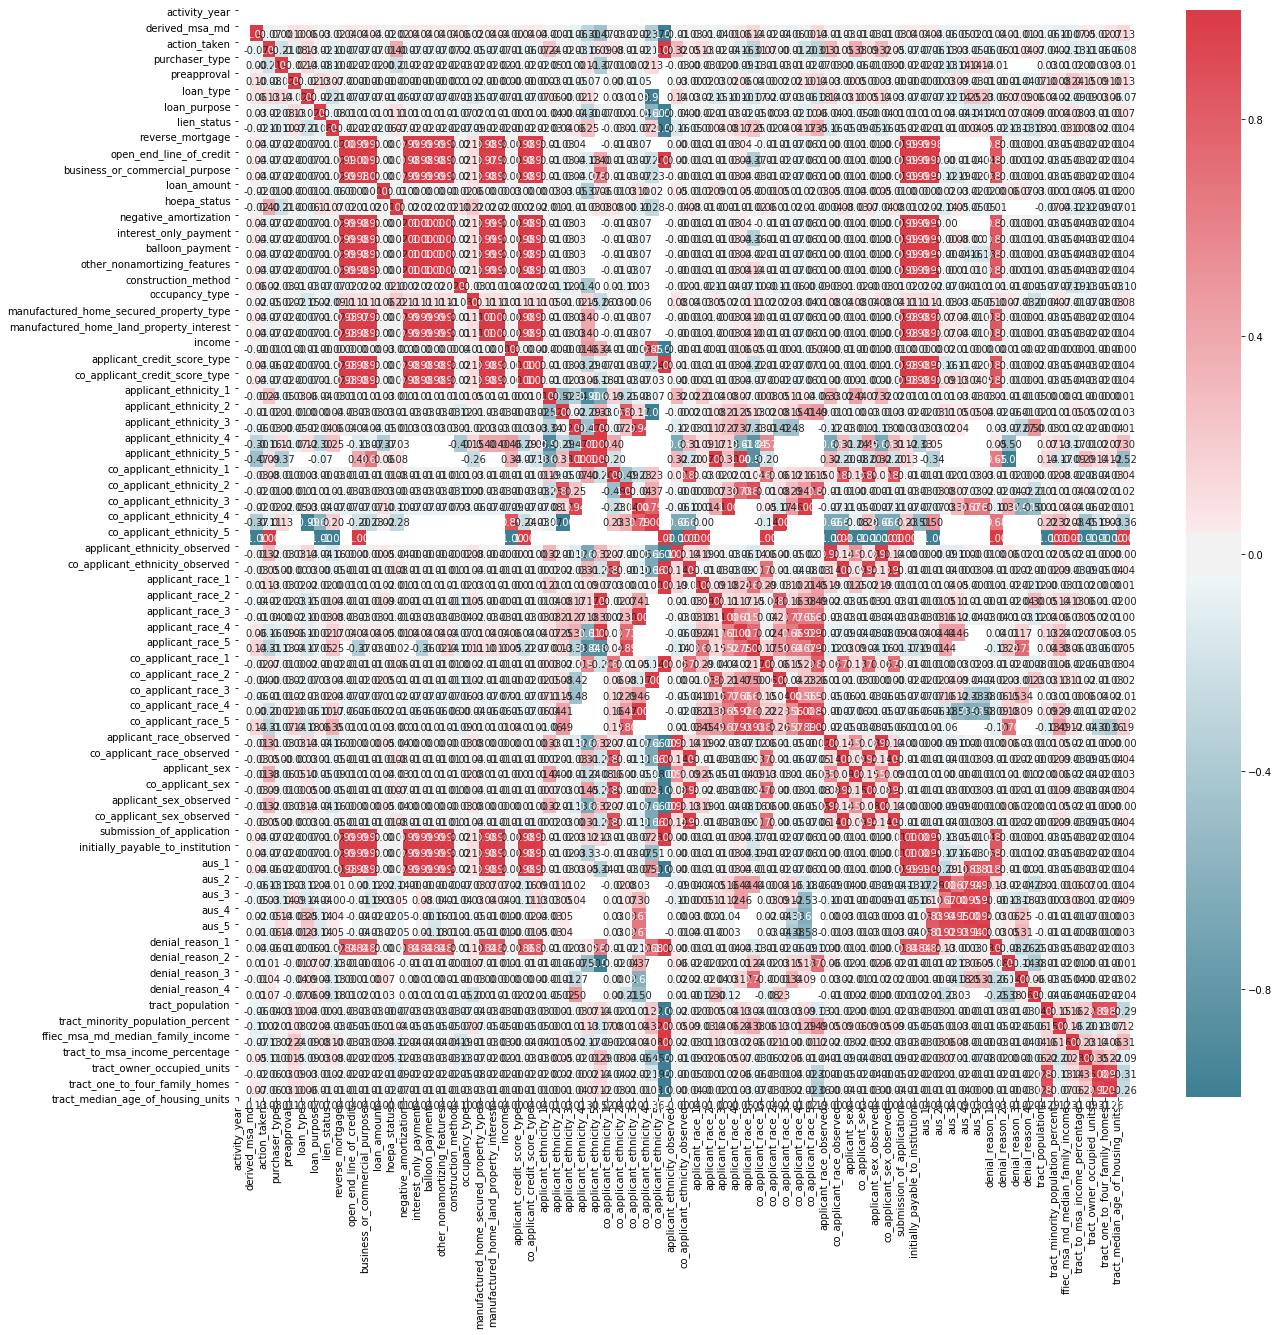

In [161]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(20, 20))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot

In [156]:
dataset.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2018,RVDPPPGHCGZ40J4VQ731,17980,GA,13215,1.3215e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,7755,38.28,56000,162,2305,2966,12
1,2018,B4TYDEB6GKMZO031MB27,15804,NJ,34007,3.40076e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2527,14.84,92400,155,843,901,51
2,2018,5493002QI2ILHHZH8D20,12420,TX,48453,4.8453e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5690,54.60,86000,76,1271,2212,27
3,2018,549300BRJZYHYKT4BJ84,35084,NJ,34027,3.4027e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4872,52.13,100700,158,1395,1547,30
4,2018,B4TYDEB6GKMZO031MB27,29460,FL,12105,1.2105e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,1811,6.74,53600,208,407,762,74


In [6]:
dataset.shape

(1511965, 99)

In [7]:
dataset['action_taken'].value_counts()

1    772718
3    254578
6    200621
4    176860
5     55271
2     34162
7     10290
8      7465
Name: action_taken, dtype: int64

In [8]:
index_names = dataset[ (dataset['action_taken'] == 4) | (dataset['action_taken']==5)|(dataset['action_taken']==6)|(dataset['action_taken']==8)].index
dataset.drop(index_names , inplace=True)

In [9]:
dataset.shape

(1071748, 99)

In [10]:
dataset['action_taken'].value_counts()

1    772718
3    254578
2     34162
7     10290
Name: action_taken, dtype: int64

In [11]:
dataset['action_taken'] = dataset['action_taken'].replace([3,7],0)

In [12]:
dataset['action_taken'] = dataset['action_taken'].replace([1,2],1)

In [13]:
dataset['action_taken'].value_counts()

1    806880
0    264868
Name: action_taken, dtype: int64

In [11]:
# dropping_columns = []
# for i in range(len(dataset.columns)):
#     if dataset.iloc[:,i].isnull().mean() > 0.5:
#         dropping_columns.append(dataset.iloc[:,i].name)
# dataset = dataset.drop(dropping_columns,axis=1)
# dataset = dataset.dropna()

In [13]:
# dataset['action_taken'].value_counts()

1    531267
0      3671
Name: action_taken, dtype: int64

In [106]:
dataset.shape

(1071748, 99)

In [25]:
features = ['co_applicant_age','interest_rate','activity_year','conforming_loan_limit','conforming_loan_limit','rate_spread','hoepa_status','total_loan_costs','origination_charges','negative_amortization','interest_only_payment','balloon_payment','other_nonamortizing_features','initially_payable_to_institution','denial_reason_1',"applicant_ethnicity_observed","co_applicant_ethnicity_observed","applicant_race_observed","co_applicant_race_observed","applicant_sex_observed","co_applicant_sex_observed","census_tract"]
dataset = dataset.drop(features, axis=1)
#  dataset = df.copy()
dataset.shape

(1071748, 48)

In [16]:
dropping_columns = []
for i in range(len(dataset.columns)):
    if dataset.iloc[:,i].isnull().mean() > 0.5:
        dropping_columns.append(dataset.iloc[:,i].name)
dataset = dataset.drop(dropping_columns,axis=1)

In [17]:
dataset.shape

(1071748, 48)

In [18]:
dataset.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,27
1,float64,6
2,object,15


In [19]:
dataset.dtypes[dataset.dtypes=='object']

lei                          object
state_code                   object
county_code                  object
derived_loan_product_type    object
derived_dwelling_category    object
derived_ethnicity            object
derived_race                 object
derived_sex                  object
loan_to_value_ratio          object
loan_term                    object
property_value               object
total_units                  object
debt_to_income_ratio         object
applicant_age                object
applicant_age_above_62       object
dtype: object

In [20]:
dataset['debt_to_income_ratio'].value_counts()

20%-<30%    164981
30%-<36%    151602
50%-60%      87256
>60%         69071
<20%         68396
42           38502
44           35641
49           35338
Exempt       34362
41           34295
40           33716
39           32735
43           32470
38           31106
37           30017
36           28693
45           28449
48           27986
46           26777
47           26767
Name: debt_to_income_ratio, dtype: int64

In [34]:
dataset = dataset[dataset.debt_to_income_ratio!='Exempt']

In [35]:
dataset['debt_to_income_ratio'].value_counts()

20%-<30%    164981
30%-<36%    151602
50%-60%      87256
>60%         69071
<20%         68396
42           38502
44           35641
49           35338
41           34295
40           33716
39           32735
43           32470
38           31106
37           30017
36           28693
45           28449
48           27986
46           26777
47           26767
Name: debt_to_income_ratio, dtype: int64

In [36]:
dataset['debt_to_income_ratio'].isna().sum()

53588

In [39]:
dataset = dataset['debt_to_income_ratio'].dropna()

In [42]:
dataset

1          20%-<30%
2           50%-60%
4                44
5          30%-<36%
6                46
7          30%-<36%
10               42
11             <20%
13               39
14         30%-<36%
15          50%-60%
16               39
18         20%-<30%
19               47
20               47
21          50%-60%
22          50%-60%
23         20%-<30%
25               47
29         20%-<30%
30         30%-<36%
31               46
33               37
34             <20%
35               49
36         30%-<36%
37          50%-60%
39         20%-<30%
40         30%-<36%
43             >60%
             ...   
1511921        <20%
1511922    30%-<36%
1511924          47
1511928    30%-<36%
1511929        <20%
1511930        <20%
1511931          40
1511932        >60%
1511936    30%-<36%
1511937    20%-<30%
1511938          48
1511940          44
1511941          48
1511942          41
1511943    20%-<30%
1511944     50%-60%
1511945    30%-<36%
1511947     50%-60%
1511948          48


In [21]:
cat_features = ['lei','state_code','county_code','derived_loan_product_type','derived_dwelling_category','derived_ethnicity','derived_race','derived_sex','applicant_age','applicant_age_above_62','total_units','debt_to_income_ratio']

In [114]:
#dataset = dataset.replace(to_replace=['Exempt'], value=['1.00'])

In [23]:
dataset['debt_to_income_ratio'].value_counts().mean

50908.0

In [115]:
float_var = ['loan_to_value_ratio','loan_term','property_value']
for i in float_var:
    dataset[i]=dataset[i].apply(float)

In [117]:
dataset['loan_to_value_ratio'].isna().sum()

67243

In [118]:
len(cat_features)

12

In [119]:
len(float_var)

3

In [22]:
dataset["loan_to_value_ratio"].value_counts().mean()

12.697412496365866

In [121]:
dataset.shape

(1071748, 48)

In [122]:
dataset.isnull().sum()

lei                                             0
derived_msa_md                                  0
state_code                                  11862
county_code                                 22033
derived_loan_product_type                       0
derived_dwelling_category                       0
derived_ethnicity                               0
derived_race                                    0
derived_sex                                     0
action_taken                                    0
purchaser_type                                  0
preapproval                                     0
loan_type                                       0
loan_purpose                                    0
lien_status                                     0
reverse_mortgage                                0
open_end_line_of_credit                         0
business_or_commercial_purpose                  0
loan_amount                                     0
loan_to_value_ratio                         67243


In [123]:
dataset = dataset.replace(to_replace=['Exempt'], value=['1.00'])

In [124]:
dataset['loan_to_value_ratio'].isna().sum()

67243

In [125]:
dataset[cat_features] = dataset[cat_features].apply(lambda x: pd.factorize(x)[0])

In [126]:
dataset[float_var] = dataset[float_var].apply(pd.to_numeric, errors='ignore')

In [129]:
dataset['loan_to_value_ratio'].isna().sum()

67243

In [130]:
dataset['loan_to_value_ratio'].fillna((dataset['loan_to_value_ratio'].mean()), inplace=True)

In [131]:
dataset['property_value'].fillna((dataset['property_value'].mean()), inplace=True)

In [132]:
dataset.drop(dataset[dataset['applicant_age'] == "8888"].index, inplace = True) 

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [133]:
dataset['loan_term'].fillna((dataset['loan_term'].mean()), inplace=True)
dataset['income'].fillna((dataset['income'].mean()), inplace=True)


In [134]:
dataset['applicant_age'].value_counts()

2    241036
3    236243
1    199729
0    192626
5    111561
7     39364
4     31210
6     19979
Name: applicant_age, dtype: int64

In [135]:
dataset.head()

,lei,derived_msa_md,state_code,county_code,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,applicant_age_above_62,submission_of_application,aus_1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
1,0,15804,0,0,0,0,0,0,0,1,...,0,1,2,2527,14.84,92400,155,843,901,51
2,1,12420,1,1,1,0,1,1,1,0,...,0,1,1,5690,54.60,86000,76,1271,2212,27
4,0,29460,2,2,2,0,0,2,2,1,...,0,1,6,1811,6.74,53600,208,407,762,74
5,2,45940,0,3,0,0,0,2,1,1,...,0,1,1,7505,35.24,98900,104,1455,1850,50
6,3,46060,3,4,0,1,2,2,0,0,...,0,1,6,5744,24.34,60600,118,1799,2686,25


In [136]:
dataset.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,39
1,float64,9


In [137]:
dataset.dtypes[dataset.dtypes=='object']

Series([], dtype: object)

In [139]:
dataset = dataset.dropna()

In [140]:
dataset.isna().sum()

lei                                         0
derived_msa_md                              0
state_code                                  0
county_code                                 0
derived_loan_product_type                   0
derived_dwelling_category                   0
derived_ethnicity                           0
derived_race                                0
derived_sex                                 0
action_taken                                0
purchaser_type                              0
preapproval                                 0
loan_type                                   0
loan_purpose                                0
lien_status                                 0
reverse_mortgage                            0
open_end_line_of_credit                     0
business_or_commercial_purpose              0
loan_amount                                 0
loan_to_value_ratio                         0
loan_term                                   0
property_value                    

In [142]:
dataset.to_csv('./sample_clean.csv', index = False)